### Q1. Housing Price Prediction (34 points)

<ol type ="a">
<li>
<b>Dataset Description:</b> The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). <br>
The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. <br>
The attributes in the dataset are as follows; their names are self-explanatory: <br>
<ol type ="i">
<li>
longitude (continuous): One of the coordinates that are used to identify the California district block
</li><li>
latitude (continuous): One of the coordinates that are used to identify the California district block
</li><li>
housing_median_age (continuous): Average age of the house in California district block
</li><li>
total_rooms (continuous): Total number of rooms of all the houses in the California district block
</li><li>
total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block
</li><li>
population (continuous): Number of people residing in the district block
</li><li>
households (continuous): Number of families in the district block
</li><li>
median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars) 
</li><li>
ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc. 
</li><li>
median_house_value.(continuous): Median house value within a district block (measured in US Dollars)
</li>
</ol>

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 
</li>



In [47]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<b>b. Data Loading / Preprocessing: (10 points)</b>

<ol type = "i"><li>Loading: (2 points)</li></ol>
<ol type = "1"><li>
Load the California housing dataset using pandas.read_csv() function and store it in the variable (i.e., a pandas dataframe) named `df’.
</li><ol>

In [48]:
df = pd.read_csv('housing.csv')

2.	The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [49]:
df.shape

(20640, 10)

3.	Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using pandas.DataFrame.dropna() function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [50]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [51]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
df = df.dropna()

In [53]:
df.shape

(20433, 10)

4.	Create a data frame ‘corr_df’ by dropping the columns latitude, longitude, and ocean_proximity using the pandas.DataFrame.drop() function. Use the Pearson correlation to find the correlation of each remaining feature in the ‘corr_df’ with the target variable ‘median_house_value’ using the function pandas.DataFrame.corrwith(). Report results in the following table.

In [54]:
corr_df = df.drop(['longitude','latitude','ocean_proximity'],axis=1)

In [55]:
corr_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [56]:
corr_df.iloc[:,0:6].corrwith(corr_df['median_house_value'],method='pearson',axis=0)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
dtype: float64

| Feature Name  |  Pearson Correlation |  
|---|---|
| housing_median_age  | 0.106432  |   
| total_rooms  | 0.133294  |  
| total_bedrooms  | 0.049686  |
| population  | -0.025300  | 
| households  | 0.064894  | 
| median_income  | 0.688355  | 



5. Create a data frame X of features (by dropping the column ‘median_house_value’’ from the original data frame) using the pandas.DataFrame.drop() function. Create a Series object of targets Y (by only considering the ‘median_house_value’ column from the original data frame (Do NOT use the ‘corr_df’ data frame in this step. Use the data frame which was obtained as a result of step b.i.3 above).

In [57]:
X = df.drop(['median_house_value'],axis=1)

In [58]:
#le = LabelEncoder()
#X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])

In [59]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [60]:
Y = df['median_house_value']

In [61]:
type(Y)

pandas.core.series.Series

<b>ii.	Data Visualization: (3 points)</b>

1.	Use pandas.DataFrame.hist(bins = 50) function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

In [62]:
dv = df.drop(['longitude','latitude','ocean_proximity'],axis=1)

In [63]:
dv.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


array([[<AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>],
       [<AxesSubplot: title={'center': 'median_house_value'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

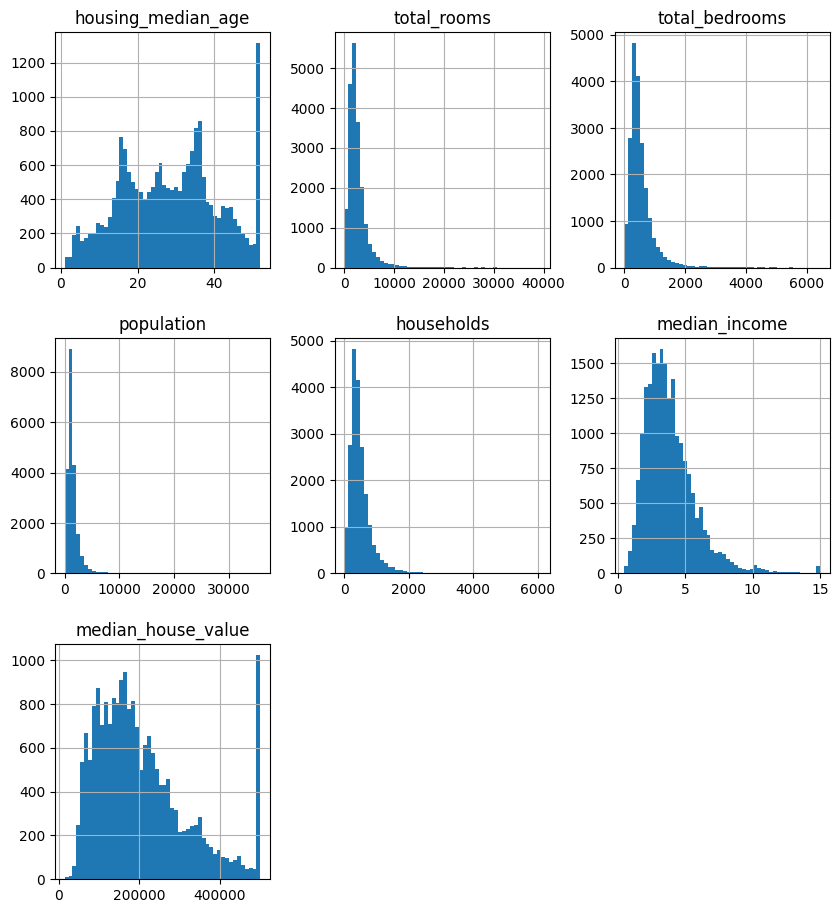

In [64]:
dv.hist(bins=50, figsize=(10,11))

2.	Use pandas.dataframe.describe() function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [65]:
X.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


3.	Use pandas.get_dummies to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity

In [66]:
X = pd.get_dummies(X, columns=['ocean_proximity'])

In [67]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


<b>iii.	Data Splitting: (2 points) </b>

1.	Split data into training and test sets using the sklearn train_test_split() function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames X_train, X_test, y_train, y_test. (respectively, the training features, testing features, training targets and testing target). 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [69]:
y_train

19566     93400.0
7292     128800.0
17618    327500.0
17518    240900.0
5172      86200.0
           ...   
11397    273400.0
12081    160800.0
5447     335400.0
866      231200.0
15948    251800.0
Name: median_house_value, Length: 14303, dtype: float64

In [70]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14303, 13) (6130, 13) (14303,) (6130,)


<b>iv.	Data Scaling: (3 points)</b>

1.	Use the StandardScaler() to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values.

In [71]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

2.	For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in X_train, and y_train again.

In [72]:
X_train = scaler_features.fit_transform(X_train.values)
y_train = scaler_target.fit_transform(y_train.values[:,None])

3.	Scale the X_test and y_test as well and store the scaled values back in X_test and y_test. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`). 
Henceforth, X_train, y_train, X_test, y_test will refer to the scaled data unless stated otherwise.

In [73]:
X_test = scaler_features.transform(X_test.values)
y_test = scaler_target.transform(y_test.values[:,None])

4.	Use pandas.DataFrame.hist(bins = 50) function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the X_train and y_train dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot.

In [74]:
scaled_trainDF = pd.DataFrame(X_train,columns=X.columns.tolist())
scaled_drop_trainDF = scaled_trainDF.drop(['longitude','latitude','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'],axis=1)

array([[<AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>],
       [<AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>]], dtype=object)

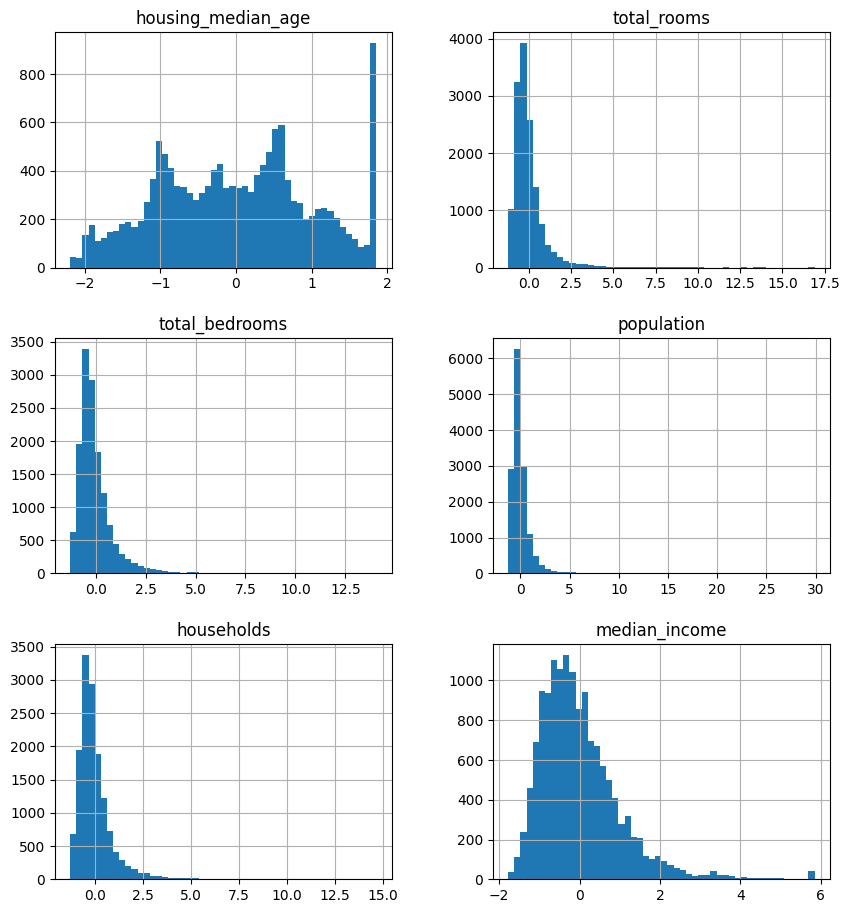

In [75]:
scaled_drop_trainDF.hist(bins=50, figsize=(10,11))

array([[<AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

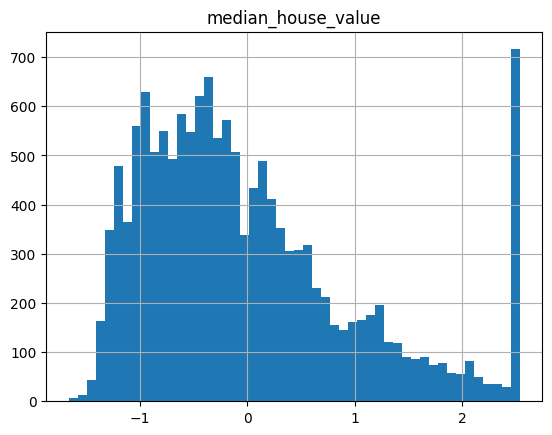

In [76]:
scaled_YtrainDF = pd.DataFrame(y_train,columns=[Y.name])
scaled_YtrainDF.hist(bins=50)

<b>c.	Modelling: (10 points)</b>

i.	Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [77]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

ii.	(3 points) Once instantiated, `fit()` the model using the scaled X_train, y_train data

In [78]:
LR.fit(X_train,y_train)

LinearRegression()

iii.	(2 points) Employ the `predict()` function to obtain predictions on X_test. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space).

In [79]:
y_preds = LR.predict(X_test)

iv.	(2 points) Use inverse_transform() function to convert the normaized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [80]:
y_preds = scaler_target.inverse_transform(y_preds)

v.	(3 points) Perform PCA on the features (X_train) and set n_component as 2.

In [81]:
pca = PCA(n_components=2,random_state=43)
data_pca = pca.fit_transform(X_train)

1.	Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis. 

Text(0, 0.5, 'Second PCA Component')

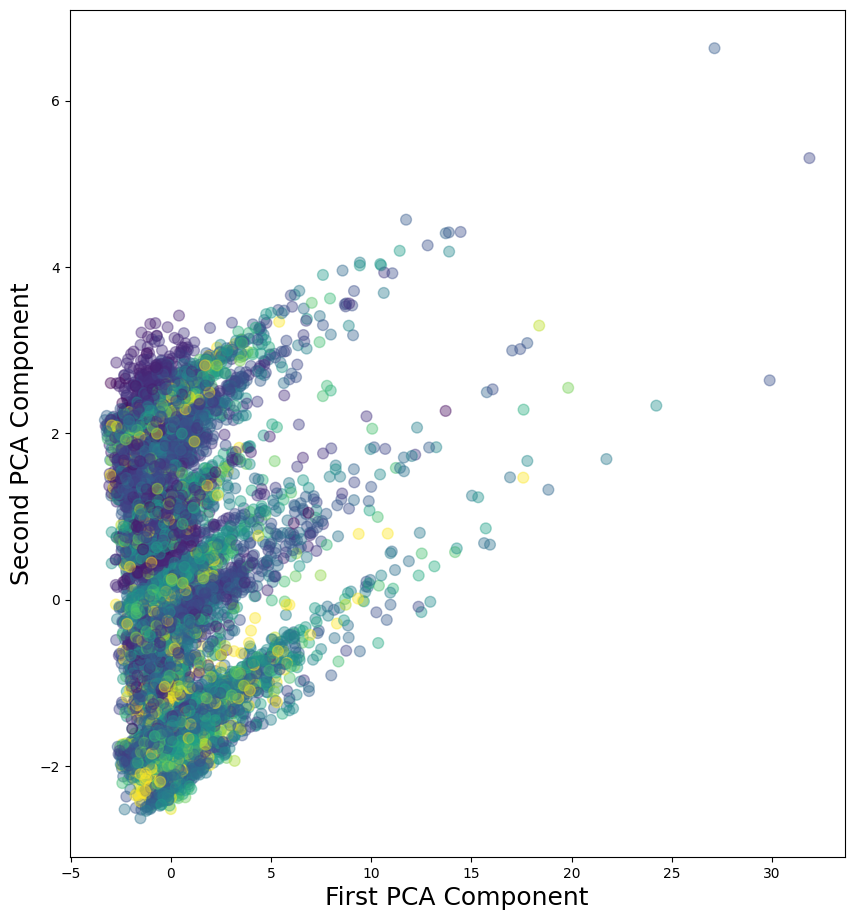

In [82]:
fig, axs = plt.subplots(1,1,figsize=(10,11))
axs.scatter(data_pca[:,0],data_pca[:,1],c=y_train,alpha=0.4,s=60)
axs.set_xlabel("First PCA Component",fontsize=18)
axs.set_ylabel("Second PCA Component",fontsize=18)

2.	Calculate the total percentage of variance captured by the 2 PCA components using pca.explained_variance_ratio_. Also, report the strength of each PCA component using pca.singular_values_.

In [83]:
evr = pca.explained_variance_ratio_
total_evr = evr.sum() * 100
print("Explained variation per principal component: {}".format(evr))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr))
print("Strength of each PCA components: ",pca.singular_values_)

Explained variation per principal component: [0.30110561 0.19742525]
Total percentage of variance captured by the first 2 components of PCA: 49.85308586784514
Strength of each PCA components:  [236.61630546 191.59606813]


**d.	Evaluation: (6 points)**

i.	(2 points) Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis.

Text(0, 0.5, 'Predicted Median House Values ---->')

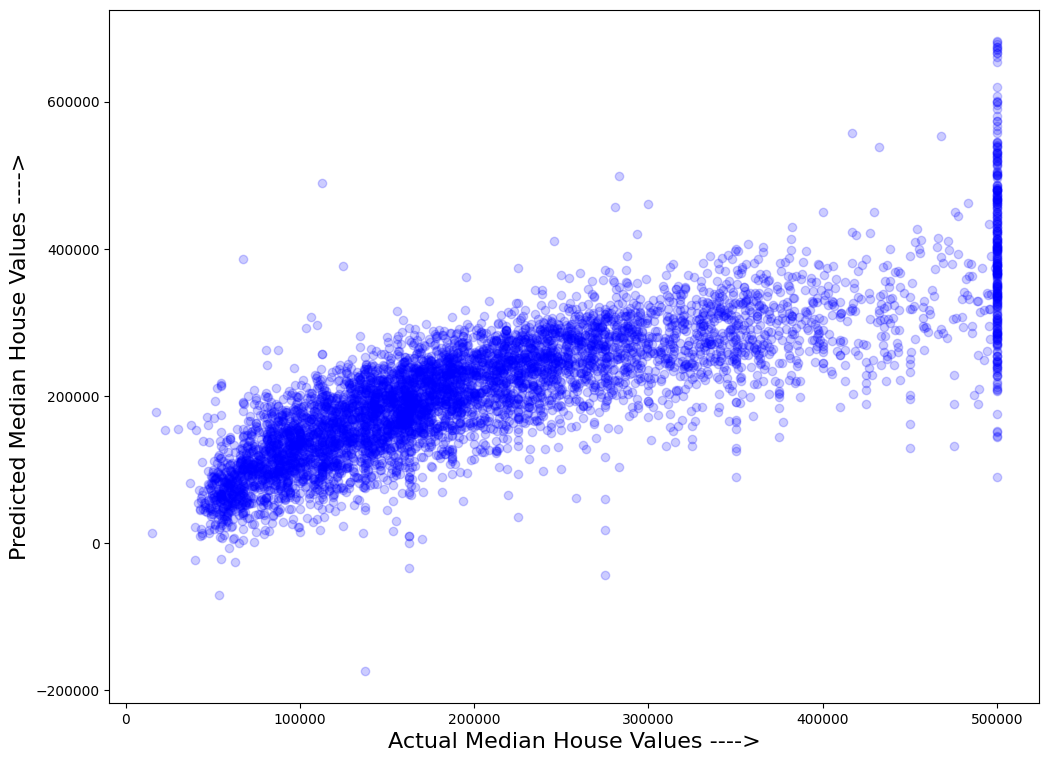

In [84]:
y_test = scaler_target.inverse_transform(y_test)
fig, ax = plt.subplots(1,1,figsize=(12,9))
ax.scatter(y_test, y_preds, c='b', alpha=0.2)
ax.set_xlabel("Actual Median House Values ---->", fontsize=16)
ax.set_ylabel("Predicted Median House Values ---->", fontsize=16)

ii.	(4 points) Calculate MAPE, RMSE  and R2 for the model and report them in the following table. 
Hint for RMSE set the squared parameter to False.

In [85]:
mape = np.mean(np.abs((y_preds-y_test)/y_test))
r2score = r2_score(y_test.ravel(), y_preds.ravel())
rmse = math.sqrt(mean_absolute_error(y_test.ravel(), y_preds.ravel()))

In [86]:
print("MAPE = {}\nR^2 Score = {}\nRMSE = {}".format(mape,r2score,rmse))

MAPE = 0.2875296239403572
R^2 Score = 0.6538727132608757
RMSE = 222.8069258299707


| Model | MAPE  | RMSE  | R^2  |
|---|---|---|---|
| Linear Regression  | 0.2875296239403572  | 222.8069258299707 | 0.6538727132608757  |

**e.	Discussion: (8 points)**

i.	(2 points) Based on the weights of the linear regression model, rank the features (note: only continuous features) in decreasing order of influence on the predictions. 

In [87]:
features_name = X.columns.tolist()

In [88]:
importance = LR.coef_
for i in range(len(importance[0])):
    print("Feature ",features_name[i],":", ", Score: ", importance[0][i])

Feature  longitude : , Score:  -0.4645505860288883
Feature  latitude : , Score:  -0.4724303125295962
Feature  housing_median_age : , Score:  0.12024070419278765
Feature  total_rooms : , Score:  -0.12440196953376799
Feature  total_bedrooms : , Score:  0.3875611496903069
Feature  population : , Score:  -0.3487419332670438
Feature  households : , Score:  0.12543521320504689
Feature  median_income : , Score:  0.6486071251046329
Feature  ocean_proximity_<1H OCEAN : , Score:  -2640789311573.2573
Feature  ocean_proximity_INLAND : , Score:  -2463809512987.0967
Feature  ocean_proximity_ISLAND : , Score:  -62823684265.13278
Feature  ocean_proximity_NEAR BAY : , Score:  -1682451540501.3828
Feature  ocean_proximity_NEAR OCEAN : , Score:  -1776399649387.9543


**Ans i:** Based on the weights of the linear regression model, rank of features are given below: <br>
Rank 1 -> median_income --> 0.649<br>
Rank 2 -> total_bedrooms --> 0.388 <br>
Rank 3 -> households --> 0.125<br>
Rank 4 -> housing_median_age --> 0.12<br> 
Rank 5 -> total_rooms --> -0.124<br>
Rank 6 -> population --> -0.349<br>
Rank 7 -> longitude --> -0.465<br>
Rank 8 -> latitude --> -0.472<br>

ii.	(2 points) Discuss how the influence of the features (obtained in question e.1) relates 
to the pair-wise correlation results calculated above i.e., are the features that are highly correlated with the output also the most influential or is there some other phenomenon being observed?

In [89]:
corr_df.iloc[:,0:6].corrwith(corr_df['median_house_value'],method='pearson',axis=0)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
dtype: float64

Rank 1 -> median_income --> 0.688<br>
Rank 2 -> total_rooms --> 0.133<br>
Rank 3 -> housing_median_age --> 0.106<br>
Rank 4 -> households --> 0.065<br>
Rank 5 -> total_bedrooms --> 0.05<br>
Rank 6 -> population --> -0.025 

**Ans ii:** The phenomenon observed here is that both case have feature median_income high rank and feature population low rank. <br>
If we doesn't consider the 1st case both Rank 7 and Rank 8 features i.e., longitude and latitude. <br>
Then we see that 1st case feature total_bedrooms which is Rank 2 becomes 2nd last Rank i.e., Rank 5 for 2nd case. <br>
Then again we see that 1st case feature households which is Rank 3 becomes 3rd last Rank i.e., Rank 4 for 2nd case. <br>
Then again we see that 1st case feature housing_median_age which is Rank 4 becomes 4th last Rank i.e., Rank 3 for 2nd case. <br>
Then we see that 1st case feature total_rooms which is Rank 5 becomes 5th last Rank i.e., Rank 2 for 2nd case. <br>
This pattern is observed while comparing both cases.

iii.	(2 points) Comment about the MAPE, RMSE, R2 results. What can we learn from each of these results about the model prediction performance?

**Ans iii:** As the value of MAPE 0.29 (approx.) is very close to zero, this indicates that we have a good model prediction. The percentage error is almost zero. <br>
The value of RMSE 222.81 (approx.) is high, we can say the model prediction performance is not that good. <br>
The value of R^2 0.65 (approx.) is close to 1, we can say that the model prediction performance is working well (though it is not true for every case).

iv.	(2 points) Why is centering and scaling the data important before performing PCA?

**Ans iv:** PCA tries to get the features with the maximum variance and the variance is high for high magnitude features.
This skews the PCA towards high magnitude features, which might lead to improper selection of principle components.
That's why we require scaling the data before applying PCA. <br>
Principal components analysis (PCA) is based conventially on the eigenvector decomposition (EVD). 
Mean-centering the input data prior to the eigen-analysis is treated as an integral part of the algorithm. 
It ensures that the first principal component is proportional to the maximum variance of the input data. 
That's why we require centering the data before applying PCA.